In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import math

In [3]:
arr = []
with open("data.csv", newline='' ) as csvfile:
    for row in csvfile.readlines()[1:]:
        row = row.rstrip()
        arr.append(row.split(','))
       #print(row)

iui = []
for ar in arr:
    iui.append(ar[0] + " " +  ar[1])
#print(iui)
print(len(set(iui)))


300


In [4]:
dataFrame = pd.DataFrame(arr, columns = ["gene_id","spot_id","time","spot_fluorescence"])
dataFrame.set_index(['gene_id', 'spot_id'], inplace = True)
dataFrame.sort_index(inplace=True)
dataFrame

time spot_fluorescence
gene_id spot_id                        
1       1           0                 0
        1          20                 0
        1          40                 0
        1          60                 0
        1          80                 0
...               ...               ...
2       99       2920                 0
        99       2940                 0
        99       2960                 0
        99       2980                 0
        99       3000                 0

[45300 rows x 2 columns]

In [5]:
def fall_check(arr):
    total = 0
    index = arr[0]
    for i in arr[1:]:
        if(i < index):
            total += (index - i)
        index = i
    return total

In [6]:
features = []
curr_geneid = 1
curr_spotid = 1
xarr = []
yarr = []
for index, row in dataFrame.iterrows():
    curr_geneid, curr_spotid = str(curr_geneid), str(curr_spotid)
    #index[0], curr_geneid, index[1], curr_spotid = int(index[0]), int(curr_geneid), int(index[1]), int(curr_spotid)
    if(index[0] == curr_geneid and index[1] == curr_spotid):
        xarr.append(row["time"])
        yarr.append(row["spot_fluorescence"])
        #print(row["time"])
        #print(row["spot_fluorescence"])
    else:
        #xarr, yarr are complete
        yarr = [float(x) for x in yarr]
        xarr = [float(x) for x in xarr]
        '''
        #Only run once when creating initial figures 
        plt.figure()
        plt.ylabel("spot_fluorescence")
        plt.xlabel("Time(seconds)")
        plt.plot(xarr, yarr)
        #plt.show()
        img_name = "gene" + str(curr_geneid) + "/spotid" + str(curr_spotid) + ".png"
        plt.savefig(img_name)
        '''
        #process data after plotted(no data lost)
        #remove 0s on head and tail of graph
        condition = True
        while(condition):
            if(yarr[0] < 0.01):
                yarr.pop(0)
                xarr.pop(0)
            else:
                condition = False
        condition = True
        while(condition):
            if(yarr[-1] < 0.01):
                yarr.pop()
                xarr.pop()
            else:
                condition = False
        '''
        plt.figure()
        plt.ylabel("spot_fluorescence")
        plt.xlabel("Time(seconds)")
        plt.plot(xarr, yarr)
        plt.show()
        '''
        avg = np.mean(yarr)
        std = np.std(yarr)
        neg_calc = fall_check(yarr)
        
        features.append([curr_geneid, curr_spotid, avg, std, neg_calc])
        curr_geneid = int(index[0])
        curr_spotid = int(index[1])
        xarr = []
        yarr = []

In [7]:
featuresdf = pd.DataFrame(features, columns = ["gene_id", "spot_id", "avg", "std", "neg_calc"])
featuresdf

,gene_id,spot_id,avg,std,neg_calc
0,1,1,68.103099,48.263394,979.830245
1,1,10,50.448276,43.218262,534.448603
2,1,100,47.637776,33.734199,948.843862
3,1,101,68.873874,43.561094,966.841187
4,1,102,102.086596,33.863444,890.836499
...,...,...,...,...,...
294,2,94,41.725079,32.187360,494.336182
295,2,95,33.460126,32.101815,369.168140
296,2,96,33.954724,40.187323,527.899462
297,2,97,98.321903,71.501100,670.161964


In [8]:
g1_featuresdf = featuresdf.loc[featuresdf["gene_id"] == "1"]
g2_featuresdf = featuresdf.loc[featuresdf["gene_id"] == "2"]
g1_featuresdf

,gene_id,spot_id,avg,std,neg_calc
0,1,1,68.103099,48.263394,979.830245
1,1,10,50.448276,43.218262,534.448603
2,1,100,47.637776,33.734199,948.843862
3,1,101,68.873874,43.561094,966.841187
4,1,102,102.086596,33.863444,890.836499
...,...,...,...,...,...
145,1,95,123.894737,67.017281,850.956694
146,1,96,20.787863,21.621032,315.891218
147,1,97,68.078603,62.470286,755.567277
148,1,98,58.667267,42.724748,597.296309


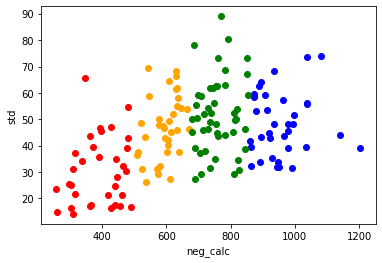

[2 3 2 2 2 3 0 2 1 1 2 3 0 2 3 3 0 0 1 0 2 2 3 3 3 1 2 2 1 3 0 3 0 1 1 2 1
 2 2 0 0 3 1 3 0 1 1 0 2 2 3 1 0 2 0 1 0 3 0 1 1 1 1 0 1 0 1 3 1 3 3 1 0 0
 3 1 1 2 2 2 1 1 1 0 0 3 3 3 0 2 2 2 1 0 3 2 2 2 2 3 1 2 3 2 1 2 0 0 2 1 0
 1 3 0 1 2 0 1 1 3 1 1 1 1 3 3 2 3 1 3 0 1 0 2 1 3 1 1 2 3 0 3 0 3 1 1 0 1
 3 1] [[389.24376607  30.26595725]
 [758.98082986  51.59080521]
 [957.1668831   48.16996042]
 [594.47181556  47.03422652]]


In [9]:
def visualization(xarr, yarr, indices, centers, feat1, feat2):
    #Note account for the different colors required depending on number of clusters
    #For the optional graph visualization when comparing features
    tempcolor_arr = ["red", "green", "blue", "orange", "purple", "pink"]
    for x in range(len(xarr)):
        plt.scatter(xarr[x], yarr[x], color=tempcolor_arr[indices[x]])
    plt.xlabel(str(feat1))
    plt.ylabel(str(feat2))
    plt.show()
def k_means_compare(feat1, feat2, gene, clusters = 2, vis = False, normalized = False):
    kmeans = StandardScaler()
    xarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat1].to_numpy()
    yarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat2].to_numpy()
    comparitive_df = pd.DataFrame({
        'x': xarr,
        'y': yarr
    })
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(comparitive_df)
    indices = kmeans.predict(comparitive_df)
    centers = kmeans.cluster_centers_
    if(vis == True):
        visualization(xarr, yarr, indices, centers, feat1, feat2)
    return (indices, centers)
cluster_indices, cluster_centers = k_means_compare("neg_calc", "std", "1", clusters = 4, vis = True)
print(cluster_indices, cluster_centers)

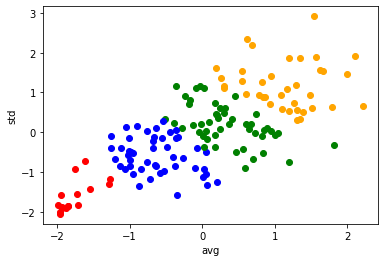

[1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 1 0 0 1 3 3 1 1 3 3 1 1 1 1 3 0 2 0 3 1 1 3
 3 1 0 0 3 2 3 0 3 3 0 2 2 1 3 3 2 1 3 2 2 0 1 1 2 2 2 3 2 1 2 2 1 3 1 2 2
 2 3 1 3 3 3 1 2 1 2 2 2 1 1 2 1 2 2 1 0 3 2 3 3 1 2 3 3 1 3 3 2 2 2 1 3 0
 1 2 2 3 2 0 3 3 1 1 2 1 0 1 2 3 1 2 3 2 1 0 1 1 1 3 3 2 2 2 2 0 2 1 3 0 1
 2 1] [[-1.76380597 -1.61196469]
 [ 0.33744311  0.19071179]
 [-0.62760718 -0.5810786 ]
 [ 1.13003589  1.19833325]]


In [27]:
def visualization(xarr, yarr, indices, centers, feat1, feat2):
    #Note account for the different colors required depending on number of clusters
    #For the optional graph visualization when comparing features
    tempcolor_arr = ["red", "green", "blue", "orange", "purple", "pink"]
    for x in range(len(xarr)):
        plt.scatter(xarr[x], yarr[x], color=tempcolor_arr[indices[x]])
    plt.xlabel(str(feat1))
    plt.ylabel(str(feat2))
    plt.show()
def k_means_compare(feat1, feat2, gene, clusters = 2, vis = False, normalization = False):
    xarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat1].to_numpy()
    yarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat2].to_numpy()
    if(normalization == True):
        xarr = [(x - np.mean(xarr)) / np.std(xarr) for x in xarr]
        yarr = [(y - np.mean(yarr)) / np.std(yarr) for y  in yarr]
    comparitive_df = pd.DataFrame({
        'x': xarr,
        'y': yarr
    })
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(comparitive_df)
    indices = kmeans.predict(comparitive_df)
    centers = kmeans.cluster_centers_
    if(vis == True):
        visualization(xarr, yarr, indices, centers, feat1, feat2)
    return (indices, centers)

def calc_cluster_strength(xarr, yarr, cluster_indices, cluster_centers):
    rv = 0
    for x in range(len(cluster_indices)):
        rv = rv + math.sqrt((xarr[x] - cluster_centers[cluster_indices[x][0]])**2)
        rv = rv + math.sqrt((yarr[x] - cluster_centers[cluster_indices[x][1]])**2)
    return rv
cluster_indices, cluster_centers = k_means_compare("avg", "std", "1", clusters = 4, vis = True, normalization = True)
#normalization should be used if calculating strength of clusters
print(cluster_indices, cluster_centers)
#n number of clusters
#automating selection of optimal clusters
#BIC/AIC -> find best number of clusters to model data

In [44]:
def visualization(xarr, yarr, indices, centers, feat1, feat2):
    #Note account for the different colors required depending on number of clusters
    #For the optional graph visualization when comparing features
    tempcolor_arr = ["red", "green", "blue", "orange", "purple", "pink"]
    for x in range(len(xarr)):
        plt.scatter(xarr[x], yarr[x], color=tempcolor_arr[indices[x]])
    plt.xlabel(str(feat1))
    plt.ylabel(str(feat2))
    plt.show()
def k_means_compare(feat1, feat2, gene, clusters = 2, vis = False, normalization = False):
    xarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat1].to_numpy()
    yarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat2].to_numpy()
    if(normalization == True):
        xarr_mean, xarr_std = np.mean(xarr), np.std(xarr)
        yarr_mean, yarr_std = np.mean(yarr), np.std(yarr)
        xarr = list(map(lambda x: (x - xarr_mean)/xarr_std, xarr))
        yarr = list(map(lambda x: (x - yarr_mean)/yarr_std, yarr))
    comparitive_df = pd.DataFrame({
        'x': xarr,
        'y': yarr
    })
    print(comparitive_df)
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(comparitive_df)
    indices = kmeans.predict(comparitive_df)
    centers = kmeans.cluster_centers_
    if(vis == True):
        visualization(xarr, yarr, indices, centers, feat1, feat2)
    return (indices, centers)

def calc_cluster_strength(xarr, yarr, cluster_indices, cluster_centers):
    rv = 0
    for x in range(len(cluster_indices)):
        rv = rv + math.sqrt((xarr[x] - cluster_centers[cluster_indices[x][0]])**2)
        rv = rv + math.sqrt((yarr[x] - cluster_centers[cluster_indices[x][1]])**2)
    return rv
cluster_indices, cluster_centers = k_means_compare("avg", "std", "1", clusters = 4, vis = False, normalization = True)
#normalization should be used if calculating strength of clusters
print(cluster_indices, cluster_centers)
#n number of clusters
#automating selection of optimal clusters
#BIC/AIC -> find best number of clusters to model data

            x         y
0   -0.022640  0.213814
1   -0.659687 -0.120626
2   -0.761100 -0.749320
3    0.005172 -0.097900
4    1.203602 -0.740753
..        ...       ...
145  1.990516  1.457002
146 -1.729937 -1.552297
147 -0.023524  1.155583
148 -0.363117 -0.153341
149  0.301275  0.474144

[150 rows x 2 columns]
[1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 1 0 0 1 3 3 1 1 3 3 1 1 1 1 3 0 2 0 3 1 1 3
 3 1 0 0 3 2 3 0 3 3 0 2 2 1 3 3 2 1 3 2 2 0 1 1 2 2 2 3 2 1 2 2 1 3 1 2 2
 2 3 1 3 3 3 1 2 1 2 2 2 1 1 2 1 2 2 1 0 3 2 3 3 1 2 3 3 1 3 3 2 2 2 1 3 0
 1 2 2 3 2 0 3 3 1 1 2 1 0 1 2 3 1 2 3 2 1 0 1 1 1 3 3 2 2 2 2 0 2 1 3 0 1
 2 1] [[-1.76380597 -1.61196469]
 [ 0.33744311  0.19071179]
 [-0.62760718 -0.5810786 ]
 [ 1.13003589  1.19833325]]


In [45]:
def visualization(xarr, yarr, indices, centers, feat1, feat2):
    #Note account for the different colors required depending on number of clusters
    #For the optional graph visualization when comparing features
    tempcolor_arr = ["red", "green", "blue", "orange", "purple", "pink"]
    for x in range(len(xarr)):
        plt.scatter(xarr[x], yarr[x], color=tempcolor_arr[indices[x]])
    plt.xlabel(str(feat1))
    plt.ylabel(str(feat2))
    plt.show()
def k_means_compare(featlst, gene, clusters = 2, vis = False, normalization = False):
    '''old format
    comparitive_df = pd.DataFrame({
        'x': xarr,
        'y': yarr
    })
    '''
    #To access former xarr, yarr you would use comparitive_df["feature_name"]
    comparitive_df = {}
    
    for feat in featlist:
        comparitive_df[str(feat)] = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat].to_numpy()
    
    if(normalization == True):
        for feat in featlst:
            arr_mean = np.mean(comparitive_df[feat])
            arr_std = np.std(comparitive_df[feat])
            comparitive_df[feat] = list(map(lambda x: (x - arr_mean)/arr_std, comparitive_df[feat]))
    comparitive_df = pd.DataFrame(comparitive_df)
    print(comparitive_df)
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(comparitive_df)
    indices = kmeans.predict(comparitive_df)
    centers = kmeans.cluster_centers_
    
    '''cannot return visualization in n number of gene types(gene types represent dimensions in plots)
    if(vis == True):
        visualization(xarr, yarr, indices, centers, feat1, feat2)
    '''
    #return (indices, centers)
    

def calc_cluster_strength(xarr, yarr, cluster_indices, cluster_centers):
    rv = 0
    for x in range(len(cluster_indices)):
        rv = rv + math.sqrt((xarr[x] - cluster_centers[cluster_indices[x][0]])**2)
        rv = rv + math.sqrt((yarr[x] - cluster_centers[cluster_indices[x][1]])**2)
    return rv
#cluster_indices, cluster_centers = 
k_means_compare(["avg", "std"], "1", clusters = 4, vis = True, normalization = True)
#normalization should be used if calculating strength of clusters
#print(cluster_indices, cluster_centers)
#n number of clusters
#automating selection of optimal clusters
#BIC/AIC -> find best number of clusters to model data

          avg       std
0   -0.022640  0.213814
1   -0.659687 -0.120626
2   -0.761100 -0.749320
3    0.005172 -0.097900
4    1.203602 -0.740753
..        ...       ...
145  1.990516  1.457002
146 -1.729937 -1.552297
147 -0.023524  1.155583
148 -0.363117 -0.153341
149  0.301275  0.474144

[150 rows x 2 columns]


In [17]:
#adaptive Dataframe checks 
comparitive_df = {}
featlist = ["avg", "std"]
for feat in featlist:
    comparitive_df[str(feat)] = featuresdf.loc[featuresdf["gene_id"] == "1", feat]
comparitive_df



{'avg': 0       68.103099
 1       50.448276
 2       47.637776
 3       68.873874
 4      102.086596
           ...    
 145    123.894737
 146     20.787863
 147     68.078603
 148     58.667267
 149     77.079911
 Name: avg, Length: 150, dtype: float64,
 'std': 0      48.263394
 1      43.218262
 2      33.734199
 3      43.561094
 4      33.863444
          ...    
 145    67.017281
 146    21.621032
 147    62.470286
 148    42.724748
 149    52.190558
 Name: std, Length: 150, dtype: float64}